<a href="https://colab.research.google.com/github/Martin-William/Wills-Code/blob/main/CondensedCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd


#PX2236 - Introduction to Condensed Matter Physics

#CA Problem 1 (15% of Module Mark)

This coursework is due to be handed in online via Learning Central on
Fri 11 Mar 2022, at 14:00. There will be no opportunity to hand in physically.
Digital photos (eg phone) of your workings are acceptable as long as they are
clear and readable, but please try to type up your answers and embed any
images. I will not accept coursework by email.

This exercise is designed to aid your understanding of X-ray diffraction. It
should also demonstrate to you that even 2nd year physics knowledge can
take you a long way in terms of interpreting real data.

We saw during the lectures that a collimated X-ray beam will be diffracted
from different crystal planes. These diffracted beams can be observed as
Laue spots on a photographic plate placed after the crystal. However, there
are a number of advantages to performing the same experiment in a slightly
different geometry, as described in figure 1. Here the photographic plate is
placed between the X-ray source and the crystal. The X-ray beam travels
though a hole in the centre of the photographic plate, and the reflected X-ray
beams are directed backwards in the direction of the X-ray source.
 
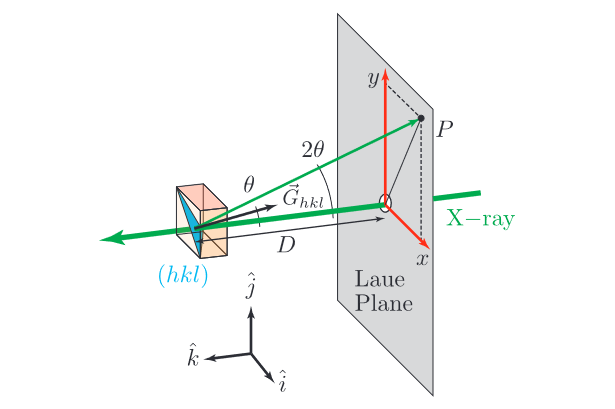

> Figure 1: X-ray diffraction in the back-scattering geometry.



The X-ray is propagating in the positive ˆk direction and the scattered (reflected) X-ray beams are directed backwards in the direction of the X-ray source. The point P is the Laue spot formed by reflection off the crystal plane (hkl).

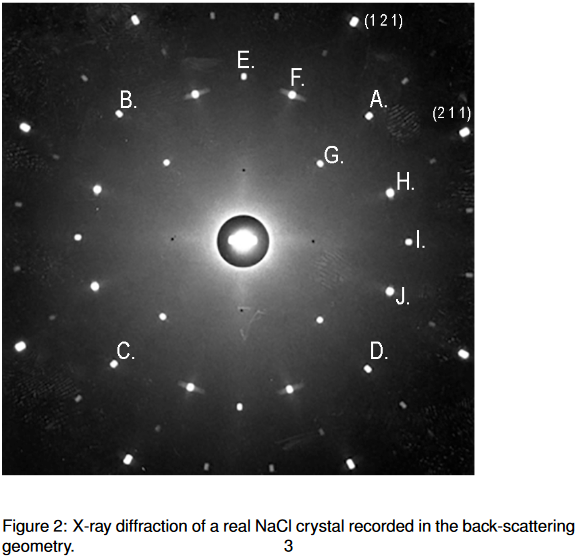

#Problem:

Certain ideal cases have very simple analytical solutions. For example, if the crystal has a cubic lattice, and it is orientated so that the face (1 0 0) is perpendicular to the incoming X-ray beam, then the cartesian coordinates
(x, y)hkl of the back-scattered Laue spots associated with the crystal plane
(hkl) are given by the simple equation,

$
(x, y)_{hkl} = (h, k) \frac{2l}{h2 + k2 − l2}D , (1)
$

where D is the distance between the crystal and the photographic plate.

Then by considering all the possible integer values h, k, l we can map out all
the Laue spots in the plane of the photographic plate (here the x − y plane,
using the geometry in figure 1).

- Part (a): As a first approximation consider h, k, l = 0, ±1, ±2 ± 3. Construct a table of with all the unique permutations and use this to calculate
the corresponding positions (x, y) of the Laue spots in the x − y plane. You
can assume for simplicity that D = 1. Feel free to use any software you wish
(such as Excel or Python etc) if it makes this task easier. [15 marks]

- Part (b): Making reference to this table, can you explain why some Laue spots
might be more pronounced (brighter or darker) than others? [5 marks]

- Part (c): Use the values in your table to plot out the expected Laue spot
pattern. Note that it is important to realise that the photographic plate does not extend to infinity. Plot your results in a square window where the axes only go as far as x = ±1.1 and y = ±1.1. Ignore Laue spots that are scattered at
higher angles that would miss the photographic plate. [20 marks]

- Part (d): Compare your result against a real X-ray diffraction pattern recorded
for single crystal NaCl in figure 2, and identify which planes produced the
spots labelled A-J. [20 marks]

- Part (e): Using the geometry described in figure 1, together with the Laue
condition, prove that equation (1) does indeed give the correct position of the
Laue spots. [40 marks]


In [91]:
'''
Part A
'''

#creates an array of all the prder non imortant permutations of the seven integers from -3 to 3.
array = np.array(list(itertools.product([-3,-2,-1,0,1, 2, 3], repeat=3)))

#print (array)

#creates some arrays to add the x and y values to.
i1 = np.array([1])
i2 = np.array([1])

#calculates the scatering position values of x and y for each of the permutations 
for i in array:
  h = i[0]
  k = i[1]
  l = i[2]

  i1 = np.r_[ i1, (2*k*l)/((k**2)+(h**2)-(l**2))]
  i2 = np.r_[ i2,(2*h*l)/((k**2)+(h**2)-(l**2))]
  #print('x = 2kl/(k^2+h^2-l^2) = ',(2*k*l)/((k**2)+(h**2)-(l**2)),'\ny = 2hl/(k^2+h^2-l^2) =', (2*h*l)/((k**2)+(h**2)-(l**2)))

#removes the inital creation value of these arrays
i1 = i1[1:]
i2 = i2[1:]

#creates the table requested in part a, of the h, k and l values and their x - y values
table1 = np.c_[ array, i1, i2]

#saves table1 as csv includining headings to the columns
df = pd.DataFrame(table1, columns = ['h', 'k', 'l','x', 'y'])
print(df)
df.to_csv('table1.csv', index=False)

       h    k    l         x         y
0   -3.0 -3.0 -3.0  2.000000  2.000000
1   -3.0 -3.0 -2.0  0.857143  0.857143
2   -3.0 -3.0 -1.0  0.352941  0.352941
3   -3.0 -3.0  0.0  0.000000  0.000000
4   -3.0 -3.0  1.0 -0.352941 -0.352941
..   ...  ...  ...       ...       ...
338  3.0  3.0 -1.0 -0.352941 -0.352941
339  3.0  3.0  0.0  0.000000  0.000000
340  3.0  3.0  1.0  0.352941  0.352941
341  3.0  3.0  2.0  0.857143  0.857143
342  3.0  3.0  3.0  2.000000  2.000000

[343 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


In [92]:
'''
Part B
'''

#creates a second table to add repeat values too
table2 = np.array(['h','k','l','x','y'])

#finds instances where the x AND y values of any two or more rows are the same
for a in table1:
  for b in table1:
    if (a[3] == b[3]) & (a[4] == b[4]):
      #print(b)
      table2 = np.c_[table2, b]

#reconfigure the table and prints int in a nicely legible format
table2 = table2.transpose()
print(table2)
print('\nBrigt spots occure due to repeat instances of x and yu values \nmeaing the intensity of the xray spots increase proportional \nto the number of incident beams on any one spot. \nExamples are all seen listed adjacently in table 2.')

#saves table2 as csv includining headings to the columns
df = pd.DataFrame(table2[1:], columns = ['h', 'k', 'l','x', 'y'])
#print(df)
df.to_csv('table2.csv', index=False)

[['h' 'k' 'l' 'x' 'y']
 ['-3.0' '-3.0' '-3.0' '2.0' '2.0']
 ['-2.0' '-2.0' '-2.0' '2.0' '2.0']
 ...
 ['1.0' '1.0' '1.0' '2.0' '2.0']
 ['2.0' '2.0' '2.0' '2.0' '2.0']
 ['3.0' '3.0' '3.0' '2.0' '2.0']]

Brigt spots occure due to repeat instances of x and yu values 
meaing the intensity of the xray spots increase proportional 
to the number of incident beams on any one spot. 
Examples are all seen listed adjacently in table 2.


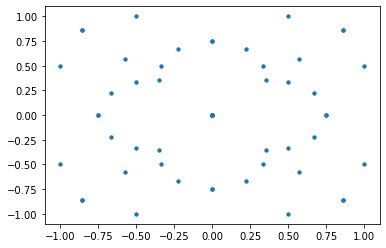

In [93]:
'''
Part C
'''

#creates more arrays to add the x and y values to.
x = np.array([1])
y = np.array([1])

#countinf variable
a = 0
#finds all the values of both x AND y that are between -1 and 1 and outputs them to arrays
for i in i1:
  if (i <= 1) & (i >= -1):
    if (i2[a] <= 1) & (i2[a] >= -1):
      x = np.r_[x, i]
      y = np.r_[y, i2[a]]
  a = a + 1    

#removes the inital creation value of these arrays
x = x[1:]
y = y[1:]

#plots the data of x and y as points
plt.figure(0)
plt.clf()
plt.plot(x,y,'.')




The labled points match up well with figure 2, it is worth noting that a number of these points have multiple hkl permutations and can be found in table 2.


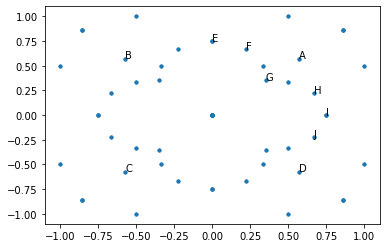

In [94]:
'''
Part D.i
'''

#replicates the above plot but labling the points that match the lables spots on figure 2
plt.figure(1)
plt.clf()
plt.plot(x,y,'.')
plt.text(0.5714285714285714,0.5714285714285714,'A')
plt.text(-0.5714285714285714,0.5714285714285714,'B')
plt.text(-0.5714285714285714,-0.5714285714285714,'C')
plt.text(0.5714285714285714,-0.5714285714285714,'D')
plt.text(0,0.75,'E')
plt.text(0.2222222222222222,0.6666666666666666,'F')
plt.text(0.35294117647058826,0.35294117647058826,'G')
plt.text(0.6666666666666666,0.2222222222222222,'H')
plt.text(0.75,0,'I')
plt.text(0.6666666666666666,-0.2222222222222222,'J')

print('The labled points match up well with figure 2, it is worth noting that a number of these points have multiple hkl permutations and can be found in table 2.')



In [95]:
'''
Part D.ii
'''

#finding all the planes that produce each point
points = np.array([['A',0.5714285714285714,0.5714285714285714],['B',-0.5714285714285714,0.5714285714285714],['C',-0.5714285714285714,-0.5714285714285714],['D',0.5714285714285714,-0.5714285714285714],['E',0,0.75],['F',0.2222222222222222,0.6666666666666666],['G',0.35294117647058826,0.35294117647058826],['H',0.6666666666666666,0.2222222222222222],['I',0.75,0],['J',0.6666666666666666,-0.2222222222222222]])

g = 0
Aplanes = np.array(['A','','','','','',])
Bplanes = np.array(['B','','','','','',])
Cplanes = np.array(['C','','','','','',])
Dplanes = np.array(['D','','','','','',])
Eplanes = np.array(['E','','','','','',])
Fplanes = np.array(['F','','','','','',])
Gplanes = np.array(['G','','','','','',])
Hplanes = np.array(['H','','','','','',])
Iplanes = np.array(['I','','','','','',])
Jplanes = np.array(['J','','','','','',])


for n in points:
  c = 0
  for e in table2[1:]:
    if (g == 0) & (n[1] == e[3]) & (n[2] == e[4]):
      Aplanes = np.c_[Aplanes, np.r_[c, e]]
      c +=1
    if (g == 1) & (n[1] == e[3]) & (n[2] == e[4]):
      Bplanes = np.c_[Bplanes, np.r_[c, e]]
      c +=1
    if (g == 2) & (n[1] == e[3]) & (n[2] == e[4]):
      Cplanes = np.c_[Cplanes, np.r_[c, e]]
      c +=1
    if (g == 3) & (n[1] == e[3]) & (n[2] == e[4]):
      Dplanes = np.c_[Dplanes, np.r_[c, e]]
      c +=1
    if (g == 4) & (n[1] == e[3]) & (n[2] == e[4]):
      print('e')
      Eplanes = np.c_[Eplanes, np.r_[c, e]]
      c +=1
    if (g == 5) & (n[1] == e[3]) & (n[2] == e[4]):
      Fplanes = np.c_[Fplanes, np.r_[c, e]]
      c +=1
    if (g == 6) & (n[1] == e[3]) & (n[2] == e[4]):
      Gplanes = np.c_[Gplanes, np.r_[c, e]]
      c +=1
    if (g == 7) & (n[1] == e[3]) & (n[2] == e[4]):
      Hplanes = np.c_[Hplanes, np.r_[c, e]]
      c +=1
    if (g == 8) & (n[1] == e[3]) & (n[2] == e[4]):
      Iplanes = np.c_[Iplanes, np.r_[c, e]]
      c +=1
    if (g == 9) & (n[1] == e[3]) & (n[2] == e[4]):
      Jplanes = np.c_[Jplanes, np.r_[c, e]]
      c +=1   
  g +=1

#adds in the two planes of a single producing plane 
Eplanes = np.c_[Eplanes,np.r_[0,-3.0,0.0,-1.0,0.0,0.75]]
Iplanes = np.c_[Iplanes,np.r_[0,0.0,-3.0,-1.0,0.0,0.75]]

#combines into a singel table and transforms it for legibility
pointplanes = np.c_[Aplanes,Bplanes,Cplanes,Dplanes,Eplanes,Fplanes,Gplanes,Hplanes,Iplanes,Jplanes]
pointplanes = pointplanes.transpose()

#print(pointplanes)

#saves pointplanes as table3.csv includining headings to the columns
df = pd.DataFrame(pointplanes, columns = ['point','h', 'k', 'l','x', 'y'])
print(df)
df.to_csv('table3.csv', index=False)

   point     h     k     l                    x                    y
0      A                                                            
1      0  -2.0  -2.0  -1.0   0.5714285714285714   0.5714285714285714
2      1   2.0   2.0   1.0   0.5714285714285714   0.5714285714285714
3      2  -2.0  -2.0  -1.0   0.5714285714285714   0.5714285714285714
4      3   2.0   2.0   1.0   0.5714285714285714   0.5714285714285714
5      B                                                            
6      0  -2.0   2.0  -1.0  -0.5714285714285714   0.5714285714285714
7      1   2.0  -2.0   1.0  -0.5714285714285714   0.5714285714285714
8      2  -2.0   2.0  -1.0  -0.5714285714285714   0.5714285714285714
9      3   2.0  -2.0   1.0  -0.5714285714285714   0.5714285714285714
10     C                                                            
11     0  -2.0  -2.0   1.0  -0.5714285714285714  -0.5714285714285714
12     1   2.0   2.0  -1.0  -0.5714285714285714  -0.5714285714285714
13     2  -2.0  -2.0   1.0  -0.571

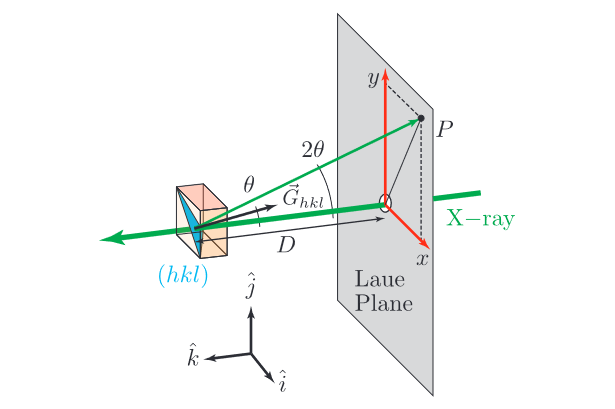

#Part E
$$

Laue condition: 2*d*sin(θ)=nλ

xi = D*sin(θₓ)
yj = D*sin(θ_y)
zk = -D  

G = a/((h^2+k^2+l^2)^0.5)

G ̇  i = 2*Π*h
G ̇  j = 2*Π*k
G ̇  k = 2*Π*l



$$

derive equ 1